In [18]:
import sys
import os

# Add the root directory to the Python environment
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_dir)

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv("../data/aggregate/aggregated_1751193331.csv.gz", compression="gzip")
df.head()

,coin,err,prep_time,algo_time,block,algo,n_nodes,n_edges,graph_time
0,0x2129ff6000b95a973236020bcd2b2006b0d8e019,NaN,0.013588,0.000277,22690278,ours,500,42,2.162045
1,0x1e610de0d7acfa1d820024948a91d96c5c9ce6b9,NaN,0.013588,0.000252,22690278,ours,500,42,2.162045
2,0xbe042e9d09cb588331ff911c2b46fd833a3e5bd6,NaN,0.013588,0.000272,22690278,ours,500,42,2.162045
3,0x2cc7a972ebc1865b346085655f929abfa74cd4dc,NaN,0.013588,0.000250,22690278,ours,500,42,2.162045
4,0x1df2099f6abbf0b05c12a61835137d84f10daa96,NaN,0.013588,0.000274,22690278,ours,500,42,2.162045


In [21]:
unique_algo_df = pd.DataFrame({
    'algo': df['algo'].unique()
})
print(f"\nUnique values in algo column:")
print(unique_algo_df)
print(f"Number of unique algorithms: {len(unique_algo_df)}")

unique_nodes_df = pd.DataFrame({
    'n_nodes': sorted(df['n_nodes'].unique())
})
print(f"\nUnique values in n_nodes column:")
print(unique_nodes_df.head(10))  # Show first 10 for readability
print(f"Number of unique node counts: {len(unique_nodes_df)}")
print(f"Range: {df['n_nodes'].min()} to {df['n_nodes'].max()}")


Unique values in algo column:
   algo
0  ours
1    bf
2  mmbf
Number of unique algorithms: 3

Unique values in n_nodes column:
   n_nodes
0      100
1      500
2     1000
3     1733
4     2228
5     4353
6     5000
7     5881
8     6251
9     6542
Number of unique node counts: 17
Range: 100 to 10000


In [22]:
# Filter data and add total_time column
n_nodes = [100, 500, 1000, 2000, 5000, 10000]
algo_names = ['ours', 'bf']

df.sort_values(by='coin', inplace=True)

# Example: Filter for n_nodes = 100 and create total_time column
df_filtered = df[(df['n_nodes'] == 5000)].copy()  # Using copy() to avoid SettingWithCopyWarning

# Add total_time column as sum of prep_time and algo_time
df_filtered['total_time'] = df_filtered['prep_time'] + df_filtered['algo_time']

df_filtered.head()

,coin,err,prep_time,algo_time,block,algo,n_nodes,n_edges,graph_time,total_time
2249557,0x0000000000000000000000000000000000000000,NaN,0.350785,0.004956,22689438,ours,5000,12688,2.084762,0.355741
2248477,0x0000000000000000000000000000000000000000,NaN,0.351692,0.005107,22690490,ours,5000,12690,2.088787,0.356799
3366855,0x0000000000000000000000000000000000000000,NaN,0.345346,0.005011,22686516,ours,5000,12684,2.128037,0.350358
1431395,0x0000000000000000000000000000000000000000,exception: Negative cycle detected.,0.346455,5.486041,22686393,bf,5000,12696,2.075120,5.832496
4135595,0x0000000000000000000000000000000000000000,NaN,0.344193,0.004695,22686773,ours,5000,12694,2.099911,0.348888


In [23]:
# Define which columns should be grouping keys vs data columns
grouping_cols = ['block', 'algo', 'n_nodes']
data_cols = [col for col in df_filtered.columns if col not in grouping_cols]

print(f"Data columns: {data_cols}")

Data columns: ['coin', 'err', 'prep_time', 'algo_time', 'n_edges', 'graph_time', 'total_time']


In [24]:
nested_data = []

# Group by the key columns and create nested structure
for (block, algo, n_nodes), group in df_filtered.groupby(['block', 'algo', 'n_nodes']):
    # Convert the group data to a list of dictionaries (this was the issue!)
    data_records = group[data_cols].to_dict('records')
    
    nested_data.append({
        'block': block,
        'algo': algo,
        'n_nodes': n_nodes,
        'data': data_records
    })

# Display first few entries
print(f"Created {len(nested_data)} nested entries")
print("\nFirst entry structure:")
print(f"Block: {nested_data[0]['block']}")
print(f"Algo: {nested_data[0]['algo']}")
print(f"N_nodes: {nested_data[0]['n_nodes']}")
print(f"Data type: {type(nested_data[0]['data'])}")
print(f"First record: {nested_data[0]['data'][0] if nested_data[0]['data'] else 'No data'}")
print(f"Number of data records: {len(nested_data[0]['data'])}")

# Convert to DataFrame if needed
nested_df = pd.DataFrame(nested_data)
print(f"\nNested DataFrame shape: {nested_df.shape}")
nested_df.head()

Created 9581 nested entries

First entry structure:
Block: 22686000
Algo: bf
N_nodes: 5000
Data type: <class 'list'>
First record: {'coin': '0x0339f586230176a243dc9abc757ba1faa5242bd3', 'err': 'exception: Negative cycle detected.', 'prep_time': 0.3240292072296142, 'algo_time': 5.924407005310059, 'n_edges': 12684, 'graph_time': 2.1596624851226807, 'total_time': 6.248436212539673}
Number of data records: 100

Nested DataFrame shape: (9581, 4)


,block,algo,n_nodes,data
0,22686000,bf,5000,[{'coin': '0x0339f586230176a243dc9abc757ba1faa...
1,22686000,ours,5000,[{'coin': '0x0339f586230176a243dc9abc757ba1faa...
2,22686001,bf,5000,[{'coin': '0x00000000e88649dd6aab90088ca25d772...
3,22686001,ours,5000,[{'coin': '0x00000000e88649dd6aab90088ca25d772...
4,22686002,bf,5000,[{'coin': '0x0202be363b8a4820f3f4de7faf5224ff0...


In [25]:
# Calculate average_time for each data record in nested_df
count = 0
for idx, row in nested_df.iterrows():
    block_data = row['data']
    total_times = [record['total_time'] for record in block_data]
    
    # Calculate running average for each position
    for i, record in enumerate(block_data):
        # Calculate average up to current position (0-indexed, so add 1)
        avg_time = sum(total_times[:i+1]) / (i+1)
        # print(record)
        record['average_time'] = avg_time

# Display first few entries to verify the calculation
print("First few entries with average_time:")
for i, row in nested_df.head().iterrows():
    print(f"\nBlock {row['block']}, Algo {row['algo']}, n_nodes {row['n_nodes']}:")
    for j, record in enumerate(row['data'][:3]):  # Show first 3 records
        print(f"  Record {j}, coin: {record['coin']}, total_time={record['total_time']:.6f}, average_time={record['average_time']:.6f}")

First few entries with average_time:

Block 22686000, Algo bf, n_nodes 5000:
  Record 0, coin: 0x0339f586230176a243dc9abc757ba1faa5242bd3, total_time=6.248436, average_time=6.248436
  Record 1, coin: 0x03c7f506cfb39494cbb4b7a207c1c04a08a2b927, total_time=5.537064, average_time=5.892750
  Record 2, coin: 0x04c17b9d3b29a78f7bd062a57cf44fc633e71f85, total_time=5.354892, average_time=5.713464

Block 22686000, Algo ours, n_nodes 5000:
  Record 0, coin: 0x0339f586230176a243dc9abc757ba1faa5242bd3, total_time=0.328886, average_time=0.328886
  Record 1, coin: 0x03c7f506cfb39494cbb4b7a207c1c04a08a2b927, total_time=0.330761, average_time=0.329823
  Record 2, coin: 0x04c17b9d3b29a78f7bd062a57cf44fc633e71f85, total_time=0.330271, average_time=0.329972

Block 22686001, Algo bf, n_nodes 5000:
  Record 0, coin: 0x00000000e88649dd6aab90088ca25d772d4607d0, total_time=6.969575, average_time=6.969575
  Record 1, coin: 0x002606d5aac4abccf6eaeae4692d9da6ce763bae, total_time=7.138604, average_time=7.054090
 

In [26]:
# Calculate total_time_average for each position across all blocks, separated by algo
# First, let's find the maximum number of records in any block
max_records = max(len(row['data']) for _, row in nested_df.iterrows())
print(f"Maximum number of records in any block: {max_records}")

# Get unique algorithms
algorithms = nested_df['algo'].unique()
print(f"Algorithms found: {algorithms}")

# Dictionary to store results for each algorithm
algo_results = {}

for algo in algorithms:
    print(f"\nProcessing algorithm: {algo}")
    
    # Filter data for current algorithm
    algo_df = nested_df[nested_df['algo'] == algo]
    
    # Initialize lists to store sums and counts for each position
    position_sums = [0] * max_records
    position_counts = [0] * max_records
    
    # Sum up average_time for each position across all blocks for this algo
    for idx, row in algo_df.iterrows():
        block_data = row['data']
        for i, record in enumerate(block_data):
            if 'average_time' in record:
                position_sums[i] += record['average_time']
                position_counts[i] += 1
    
    # Calculate total_time_average for each position
    total_time_averages = []
    for i in range(max_records):
        if position_counts[i] > 0:
            avg = position_sums[i] / position_counts[i]
            total_time_averages.append({
                'position': i,
                'total_time_average': avg,
                'block_count': position_counts[i],
                'algo': algo
            })
    
    # Convert to DataFrame and store
    algo_results[algo] = pd.DataFrame(total_time_averages)
    
    # Display results for this algorithm
    print(f"Total time averages by position for {algo}:")
    print(algo_results[algo].head(3))
    print(f"Total positions calculated for {algo}: {len(algo_results[algo])}")
    
    # Show summary statistics for this algorithm
    if len(algo_results[algo]) > 0:
        print(f"\nSummary of total_time_averages for {algo}:")
        print(f"Min: {algo_results[algo]['total_time_average'].min():.6f}")
        print(f"Max: {algo_results[algo]['total_time_average'].max():.6f}")
        print(f"Mean: {algo_results[algo]['total_time_average'].mean():.6f}")
        print(f"Median: {algo_results[algo]['total_time_average'].median():.6f}")


Maximum number of records in any block: 100
Algorithms found: ['bf' 'ours']

Processing algorithm: bf
Total time averages by position for bf:
   position  total_time_average  block_count algo
0         0            7.843304         4772   bf
1         1            7.816380         4772   bf
2         2            7.778785         4772   bf
Total positions calculated for bf: 100

Summary of total_time_averages for bf:
Min: 7.704253
Max: 7.843304
Mean: 7.720778
Median: 7.718950

Processing algorithm: ours
Total time averages by position for ours:
   position  total_time_average  block_count  algo
0         0            0.339060         4809  ours
1         1            0.339069         4809  ours
2         2            0.339083         4809  ours
Total positions calculated for ours: 100

Summary of total_time_averages for ours:
Min: 0.339060
Max: 0.339103
Mean: 0.339092
Median: 0.339099


In [27]:
# Combine all results into one DataFrame for easier plotting
all_results = []
for algo, df in algo_results.items():
    all_results.append(df)

if all_results:
    total_time_avg_df = pd.concat(all_results, ignore_index=True)
    print(f"\nCombined DataFrame shape: {total_time_avg_df.shape}")
    print(f"Combined DataFrame columns: {total_time_avg_df.columns.tolist()}")
else:
    total_time_avg_df = pd.DataFrame()
    print("\nNo results to combine")

# Optional: Add this information to the nested_df for reference (keeping original structure)
if not total_time_avg_df.empty:
    nested_df['total_time_averages'] = [total_time_avg_df['total_time_average'].tolist()] * len(nested_df)


Combined DataFrame shape: (200, 4)
Combined DataFrame columns: ['position', 'total_time_average', 'block_count', 'algo']


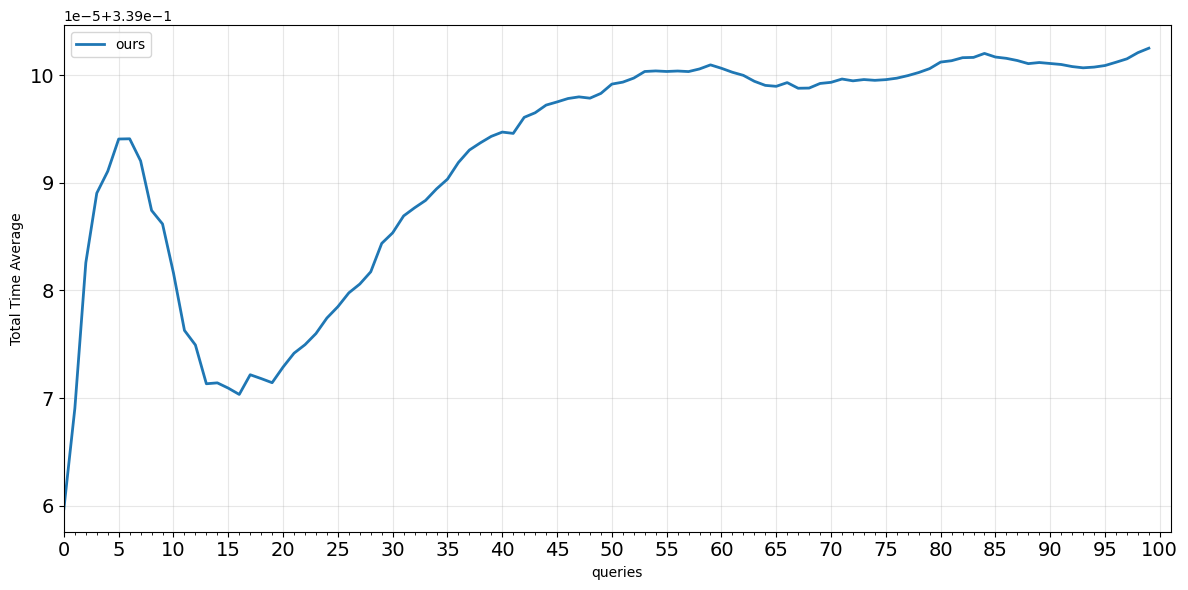


bf algorithm:
  Plot shows 100 queries
  Position range: 0 to 99

ours algorithm:
  Plot shows 100 queries
  Position range: 0 to 99


In [28]:
# Create a plot of total time average by position for each algorithm
plt.figure(figsize=(12, 6))

# Plot each algorithm separately
for algo in [
    # 'bf',
    'ours'
    ]:  
    algo_data = total_time_avg_df[total_time_avg_df['algo'] == algo]
    plt.plot(algo_data['position'], algo_data['total_time_average'], 
            linewidth=2, markersize=4, label=algo)

plt.xlim(0, 101)
plt.xlabel('queries')
plt.xticks(range(0, 101, 5), fontsize=14)
ax = plt.gca()
ax.set_xticks(range(0, 100, 1), minor=True)
plt.ylabel('Total Time Average')
plt.yticks(fontsize=14)
# plt.ylim(0, 0.12)
plt.grid(True, alpha=0.3)
plt.legend()

# Add some styling
plt.tight_layout()
plt.show()

# Optional: Print some statistics about the plot for each algorithm
for algo in total_time_avg_df['algo'].unique():
    algo_data = total_time_avg_df[total_time_avg_df['algo'] == algo]
    print(f"\n{algo} algorithm:")
    print(f"  Plot shows {len(algo_data)} queries")
    print(f"  Position range: {algo_data['position'].min()} to {algo_data['position'].max()}")
